<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [1]:
import re
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy

from bs4 import BeautifulSoup

## 1) *Clean:* Job Listings from indeed.com that contain the title "Data Scientist" 

You have `job_listings.csv` in the data folder for this module. The text data in the description column is still messy - full of html tags. Use the [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) library to clean up this column. You will need to read through the documentation to accomplish this task. 

In [15]:
import requests

# Load data

data = ('./data/job_listings.csv')
df= pd.read_csv(data, usecols=['title', 'description'])[['title', 'description']]
print(df.shape)
df.head()

(426, 2)


,title,description
0,Data scientist,"b""<div><div>Job Requirements:</div><ul><li><p>..."
1,Data Scientist I,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...
2,Data Scientist - Entry Level,b'<div><p>As a Data Scientist you will be work...
3,Data Scientist,"b'<div class=""jobsearch-JobMetadataHeader icl-..."
4,Data Scientist,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...


In [16]:
##### Your Code Here #####

# define function for cleaning up the description column

def clean_description(df):
    df = df.copy()
    df['description'] = df['description'].str.replace('b"', '')
    df['description'] = df['description'].str.replace("b'", '')
    df = df.applymap(lambda text: BeautifulSoup(text, 'html.parser').get_text())
    return df

df = clean_description(df)
df.head()

,title,description
0,Data scientist,Job Requirements:\nConceptual understanding in...
1,Data Scientist I,"Job Description\n\nAs a Data Scientist 1, you ..."
2,Data Scientist - Entry Level,As a Data Scientist you will be working on con...
3,Data Scientist,"$4,969 - $6,756 a monthContractUnder the gener..."
4,Data Scientist,Location: USA \xe2\x80\x93 multiple locations\...


In [18]:
# Create function to remove unicode using regex

def remove_unicode(df):
    df = df.copy()
    df['description'] = df['description'].str.replace(r'(\\(x|n)[a-z0-9]{0,2})', ' ')
    return df

df = remove_unicode(df)
df.head()

,title,description
0,Data scientist,Job Requirements: Conceptual understanding in ...
1,Data Scientist I,"Job Description As a Data Scientist 1, you wi..."
2,Data Scientist - Entry Level,As a Data Scientist you will be working on con...
3,Data Scientist,"$4,969 - $6,756 a monthContractUnder the gener..."
4,Data Scientist,Location: USA multiple locations + years o...


In [19]:
# random check on description

df.loc[42, 'description']

"Job Description  -10 years hands-on experience in forecasting, Machine learning, and/or optimization modeling, and simulation.Working knowledge of predictive modeling and ML tools (scikit, R)Experience with data acquisition tools (e.g. SQL, Apache Spark etc.), large datasets (Hadoop) and data miningProgramming language (Java, scripting language like Python.Good understanding of NLP conceptsHave understanding of machine learning conceptsHave understanding of Hadoop (specifically HIVE/HDFS/Kafka)Fine on programming concepts     pythonStronger skills on image analysis and more experience in Machine Learning / Deep Learning  Qualifications  ll  Additional Information  All your information will be kept confidential according to EEO guidelines.'"

## 2) Use Spacy to tokenize the listings 

In [20]:
##### Your Code Here #####

# Define stop_words, add Data Science on list of stop_words

nlp = spacy.load("en_core_web_lg")
stop_words = nlp.Defaults.stop_words.union(['data', 'science'])

# extract tokens
df['tokens'] = df['description'].apply(lambda x: [token.lemma_ for token in nlp(x) 
                                                  if (token not in stop_words)
                                                 and (token.is_punct !=True)])
df.sample(5)

,title,description,tokens
333,Data Scientist,"At YETI, we believe that time spent outdoors m...","[at, YETI, -PRON-, believe, that, time, spend,..."
77,2019 University Graduate - Data Scientist - Po...,About Uber We re changing the way people thi...,"[about, Uber, -PRON-, , re, change, the, way..."
13,Associate Data Scientist – Premium Analytics,As Spotify Premium swells to over 96M subscrib...,"[as, Spotify, Premium, swell, to, over, 96, M,..."
64,"Data Scientist - Machine Learning, AdTech","At Uber, we ignite opportunity by setting the ...","[at, Uber, -PRON-, ignite, opportunity, by, se..."
383,Associate Data Scientist,Overview Our Data Science department is seekin...,"[overview, -PRON-, Data, Science, department, ..."


## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [21]:
vect = CountVectorizer()

dtm = vect.fit_transform(df['description'])
dtm_df = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())
dtm_df.head()

,00,000,02115,03,0356,04,05,062,06366,08,...,zero,zeus,zf,zheng,zillow,zogsports,zones,zoom,zuckerberg,zurich
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 4) Visualize the most common word counts

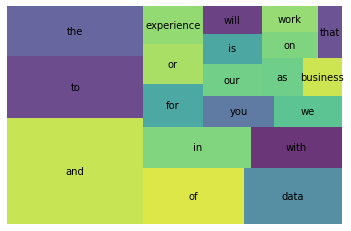

In [24]:
import squarify

top20_words = dtm_df.sum().sort_values(ascending=False)
squarify.plot(sizes=top20_words.values[:20], label=top20_words.index[:20], alpha=0.8)
plt.axis('off')
plt.show();

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [26]:
# instantiate vectorizer object

tfidf = TfidfVectorizer(stop_words='english', max_features=5000)

# create vocab and get word counts per doc
dtm = tfidf.fit_transform(df['description'])
dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())

dtm.head()

,00,000,04,10,100,1079302,11,12,125,14,...,yes,yeti,york,young,yrs,zenreach,zeus,zf,zillow,zurich
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [28]:
from sklearn.neighbors import NearestNeighbors

# fit on DTM
nn = NearestNeighbors(n_neighbors=5, algorithm='kd_tree')
nn.fit(dtm)

ideal_ds_job = ["""
Ideally I would love to work on Business Process Outsourcing industry or a
Customer Experience department. Since my experience goes beyong 10 years in
Customer Service and analyzing Net Promoter Score, Customer Satisfaction, and
Customer Service Quality Assurance data. I would like to predict customer ratings
based on customer service performance metrics like handle time, first call resolution,
and other key performance indicators. I would also like to predict CSAT performance
of agents based on their soft and technicals skills, as well as performance
behaviors."""]

In [30]:
query = tfidf.transform(ideal_ds_job)

# query using kneighbors
nn.kneighbors(query.todense())

(array([[1.26159488, 1.26159488, 1.26159508, 1.28441963, 1.28633017]]),
 array([[223, 420, 105, 361, 415]]))

In [36]:
# most relevant results
print(df.loc[223]['description'])
print('-----')
print(df.loc[420]['description'])
print('-----')
print(df.loc[105]['description'])
print('-----')
print(df.loc[361]['description'])
print('-----')
print(df.loc[415]['description'])

At Uber, we ignite opportunity by setting the world in motion. We take on big problems to help drivers, riders, delivery partners, and eaters get moving in more than 600 cities around the world.  We welcome people from all backgrounds who seek the opportunity to help build a future where everyone and everything can move independently. If you have the curiosity, passion, and collaborative spirit, work with us, and let   s move the world forward, together. About The Role  Uber   s Customer Obsession Data Science team is looking for world class data scientists to join the team, a group responsible for ensuring every Uber customer support experience is world-class. Specifically, this team works to build self-service technology and processes that are deeply integrated with the Uber customer support experience, making it easy for our customers and customer support representatives to get to the right outcome, faster. They   re also responsible for building the models and algorithms that help 

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 